In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

In [2]:
# 데이터 로드
train = pd.read_csv('C:/Users/김민성/Desktop/공모전/잡케어 추천 알고리즘 경진대회/Jobcare_data/train.csv', encoding='cp949')
test = pd.read_csv('C:/Users/김민성/Desktop/공모전/잡케어 추천 알고리즘 경진대회/Jobcare_data/test.csv', encoding='cp949')
attribute_D = pd.read_csv('C:/Users/김민성/Desktop/공모전/잡케어 추천 알고리즘 경진대회/Jobcare_data/속성_D_코드.csv', encoding='utf-8')
attribute_H = pd.read_csv('C:/Users/김민성/Desktop/공모전/잡케어 추천 알고리즘 경진대회/Jobcare_data/속성_H_코드.csv', encoding='utf-8')
attribute_L = pd.read_csv('C:/Users/김민성/Desktop/공모전/잡케어 추천 알고리즘 경진대회/Jobcare_data/속성_L_코드.csv', encoding='utf-8')

In [3]:
attribute_D

,속성 D 코드,속성 D 세분류코드,속성 D 소분류코드,속성 D 중분류코드,속성 D 대분류코드
0,4,4,3,2,1
1,5,5,3,2,1
2,7,7,6,2,1
3,8,8,6,2,1
4,9,8,6,2,1
...,...,...,...,...,...
1109,1254,1254,1254,1235,1235
1110,1255,1254,1254,1235,1235
1111,1256,1254,1254,1235,1235
1112,1257,1254,1254,1235,1235


In [4]:
attribute_H

,속성 H 코드,속성 H 중분류코드,속성 H 대분류코드
0,2,315,1
1,4,316,3
2,5,317,3
3,6,318,3
4,7,319,3
...,...,...,...
289,309,566,308
290,310,567,308
291,311,568,308
292,313,569,312


In [11]:
# 컨텐츠 열람 일시 날짜 데이터로 변환
train["contents_open_dt"] = pd.to_datetime(train["contents_open_dt"])

In [19]:
train.dtypes.value_counts()

int64             34
datetime64[ns]     1
dtype: int64

In [20]:
train.select_dtypes('int64').apply(pd.Series.nunique, axis=0)

id                        501951
d_l_match_yn                   2
d_m_match_yn                   2
d_s_match_yn                   2
h_l_match_yn                   2
h_m_match_yn                   2
h_s_match_yn                   2
person_attribute_a             2
person_attribute_a_1           8
person_attribute_b             6
person_prefer_c                5
person_prefer_d_1           1093
person_prefer_d_2           1081
person_prefer_d_3           1043
person_prefer_e               12
person_prefer_f                1
person_prefer_g                1
person_prefer_h_1            279
person_prefer_h_2            279
person_prefer_h_3            279
contents_attribute_i           3
contents_attribute_a           3
contents_attribute_j_1         9
contents_attribute_j           2
contents_attribute_c           4
contents_attribute_k           2
contents_attribute_l        1752
contents_attribute_d        1065
contents_attribute_m           5
contents_attribute_e          12
contents_a

## Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder = LabelEncoder()

train['d_l_match_yn'] = encoder.fit_transform(train['d_l_match_yn'])
train['d_m_match_yn'] = encoder.fit_transform(train['d_m_match_yn'])
train['d_s_match_yn'] = encoder.fit_transform(train['d_s_match_yn'])
train['h_l_match_yn'] = encoder.fit_transform(train['h_l_match_yn'])
train['h_m_match_yn'] = encoder.fit_transform(train['h_m_match_yn'])
train['h_s_match_yn'] = encoder.fit_transform(train['h_s_match_yn'])

In [36]:
plt.style.use('ggplot')

## 타겟 데이터 분포

<AxesSubplot:title={'center':'target distribution'}, ylabel='Frequency'>

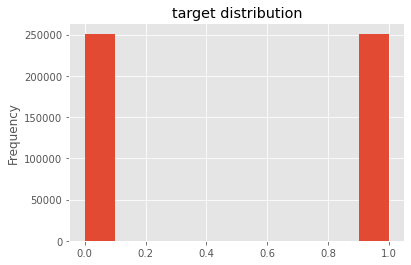

In [41]:
train['target'].plot.hist(title = "target distribution")

## 변수 EDA

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


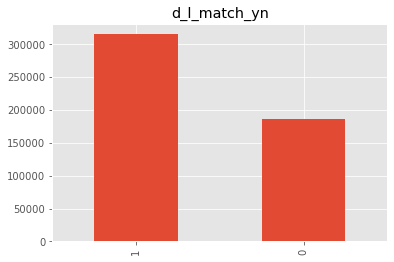

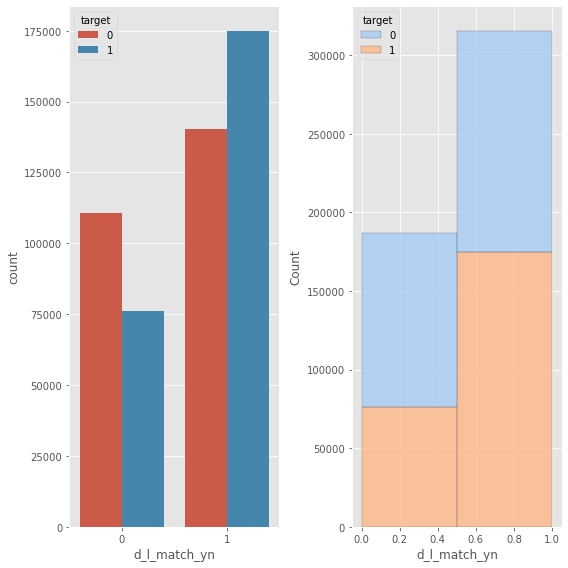

In [48]:
# d_l_match_yn : 회원 선호 속성 D 1번 대분류코드와 컨텐츠 속성 D 대분류코드가 동일한지에 대한 여부
train['d_l_match_yn'].value_counts().plot.bar(title = 'd_l_match_yn')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'd_l_match_yn'
y = 'target'

sns.countplot('d_l_match_yn', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "d_l_match_yn",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

## 타겟과는 큰 연관 X

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


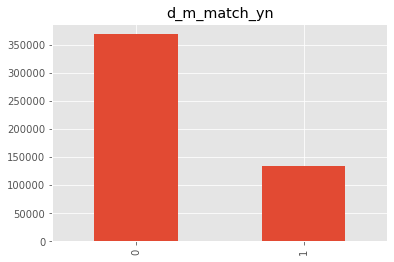

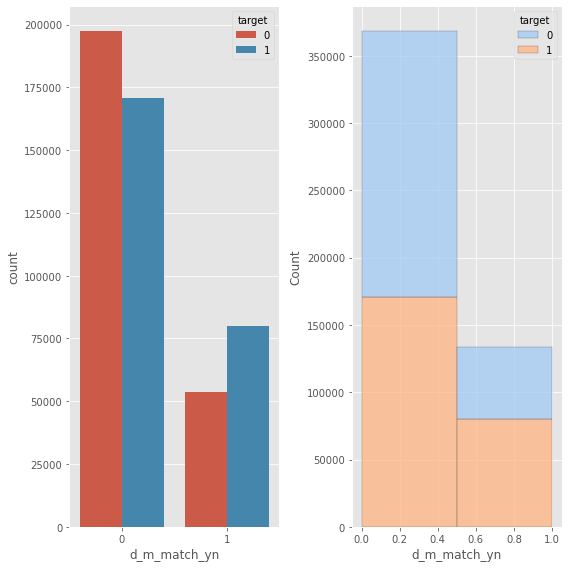

In [47]:
# d_m_match_yn : 회원 선호 속성 D 1번 세분류코드와 컨텐츠 속성 D 세분류코드가 동일한지에 대한 여부
train['d_m_match_yn'].value_counts().plot.bar(title = 'd_m_match_yn')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'd_m_match_yn'
y = 'target'

sns.countplot('d_m_match_yn', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "d_m_match_yn",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

## 타겟과는 큰 연관 X

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


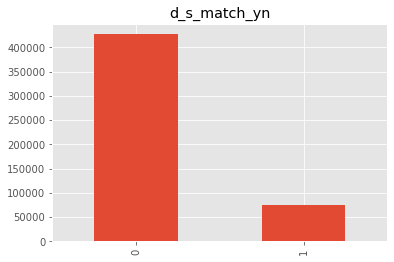

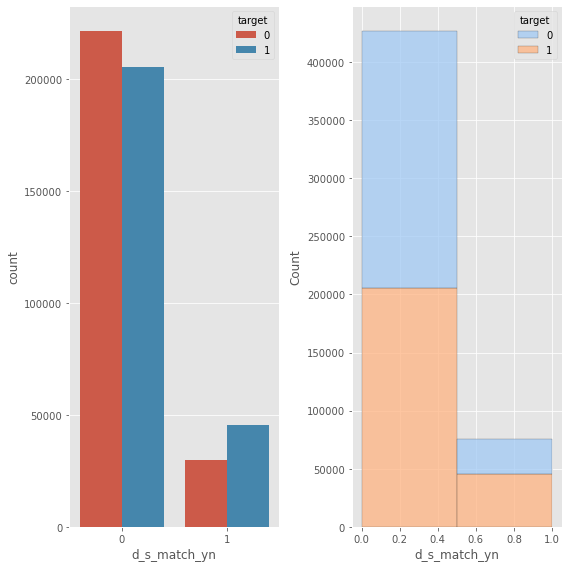

In [50]:
# d_s_match_yn : 회원 선호 속성 D 1번 코드와 컨텐츠 속성 D 코드가 동일한지에 대한 여부
train['d_s_match_yn'].value_counts().plot.bar(title = 'd_s_match_yn')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'd_s_match_yn'
y = 'target'

sns.countplot('d_s_match_yn', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "d_s_match_yn",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

## 큰 의미 없어보임

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


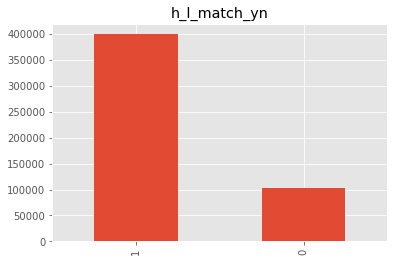

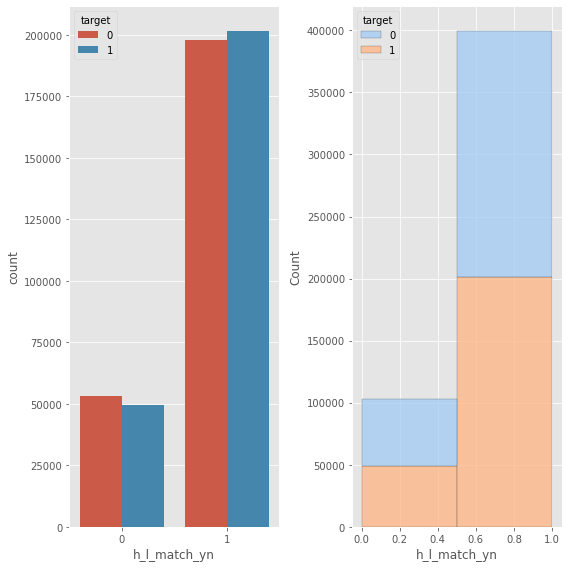

In [52]:
# h_l_match_yn : 회원 선호 속성 H 1번 대분류코드와 컨텐츠 속성 H 대분류코드가 동일한지에 대한 여부
train['h_l_match_yn'].value_counts().plot.bar(title = 'h_l_match_yn')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'h_l_match_yn'
y = 'target'

sns.countplot('h_l_match_yn', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "h_l_match_yn",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

## 의미 O

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


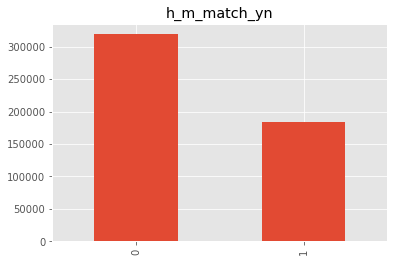

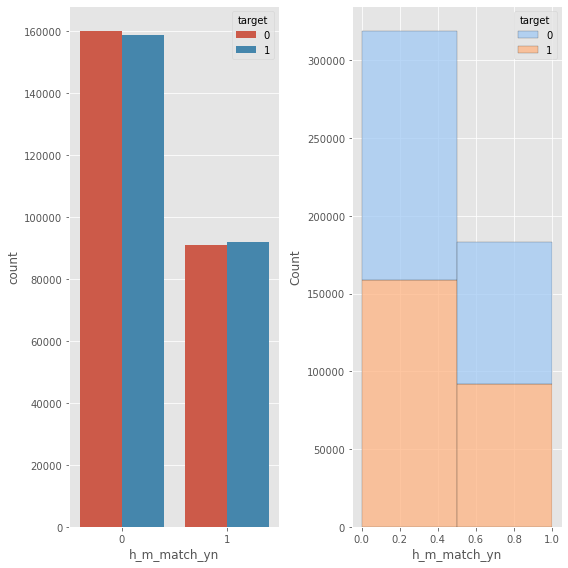

In [53]:
# h_m_match_yn : 회원 선호 속성 H 1번 중분류코드와 컨텐츠 속성 H 중분류코드가 동일한지에 대한 여부
train['h_m_match_yn'].value_counts().plot.bar(title = 'h_m_match_yn')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'h_m_match_yn'
y = 'target'

sns.countplot('h_m_match_yn', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "h_m_match_yn",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

## 의미 O

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


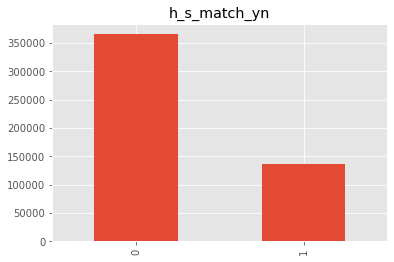

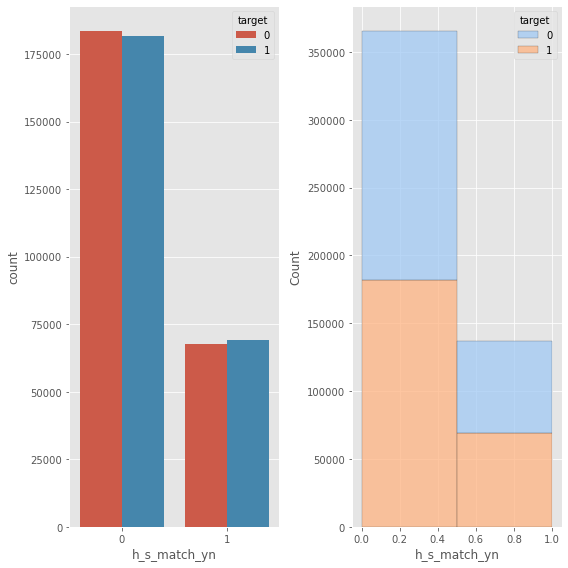

In [54]:
# h_s_match_yn : 회원 선호 속성 H 1번 코드와 컨텐츠 속성 H 코드가 동일한지에 대한 여부
train['h_s_match_yn'].value_counts().plot.bar(title = 'h_s_match_yn')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'h_s_match_yn'
y = 'target'

sns.countplot('h_s_match_yn', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "h_s_match_yn",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

## 의미 O

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


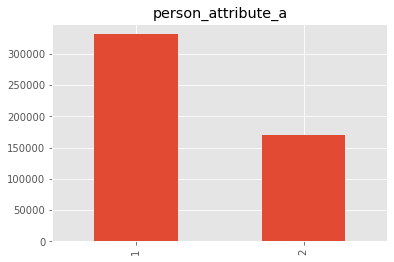

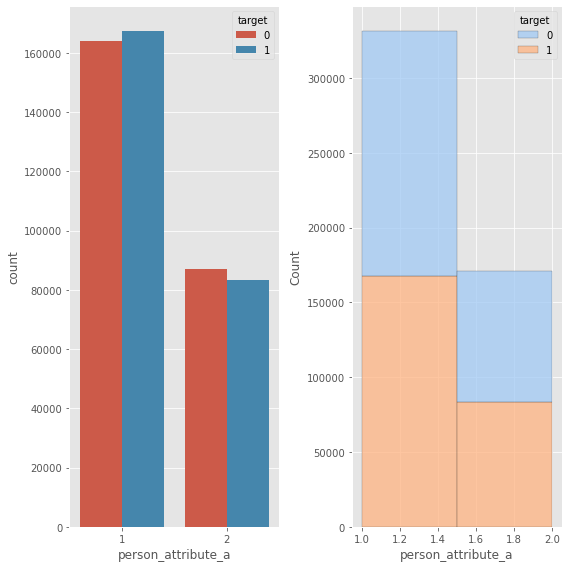

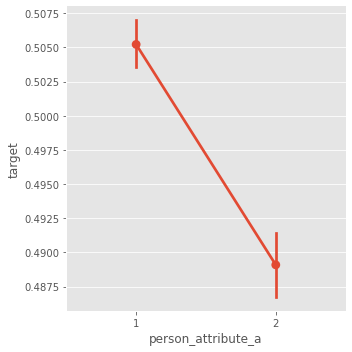

In [64]:
# person_attribute_a : 회원 속성 A
# Categorical Features
# 2개의 unique한 값
# 다른 특징 값과 연계
train['person_attribute_a'].value_counts().plot.bar(title = 'person_attribute_a')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'person_attribute_a'
y = 'target'

sns.countplot('person_attribute_a', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "person_attribute_a",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

sns.factorplot(x, y, data = train)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


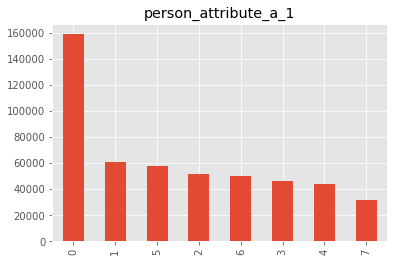

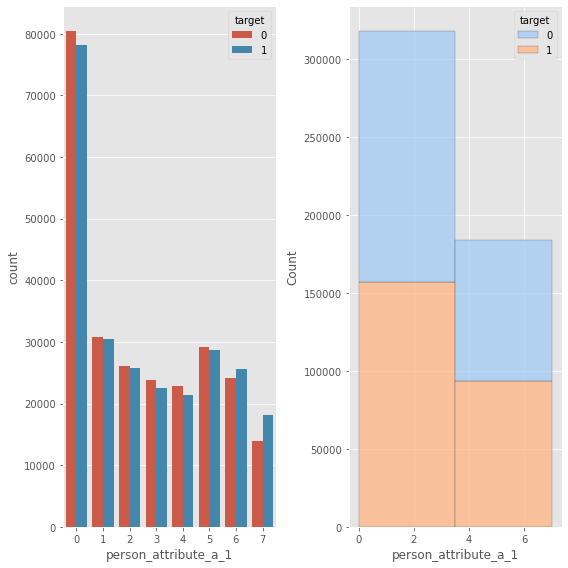

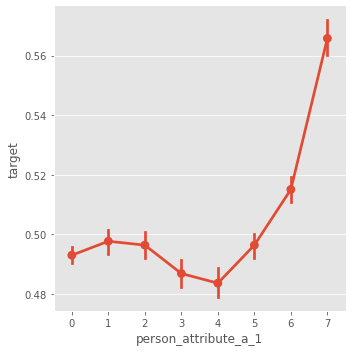

In [65]:
# person_attribute_a_1 : 회원 속성 A 하위 속성 1
train['person_attribute_a_1'].value_counts().plot.bar(title = 'person_attribute_a_1')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'person_attribute_a_1'
y = 'target'

sns.countplot('person_attribute_a_1', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "person_attribute_a_1",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

sns.factorplot(x, y, data = train)

In [7]:
pd.crosstab(train.person_attribute_a_1,train.person_attribute_a,margins=True).style.background_gradient(cmap='summer_r')

person_attribute_a,1,2,All
person_attribute_a_1,,,
0,9948,148678,158626
1,53643,7552,61195
2,47429,4466,51895
3,43412,2928,46340
4,42042,2283,44325
5,55225,2558,57783
6,48340,1480,49820
7,31221,746,31967
All,331260,170691,501951


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


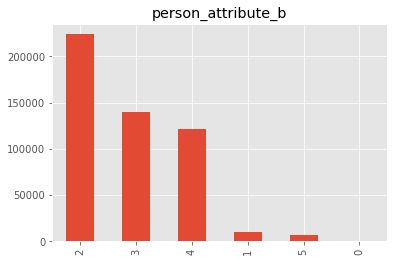

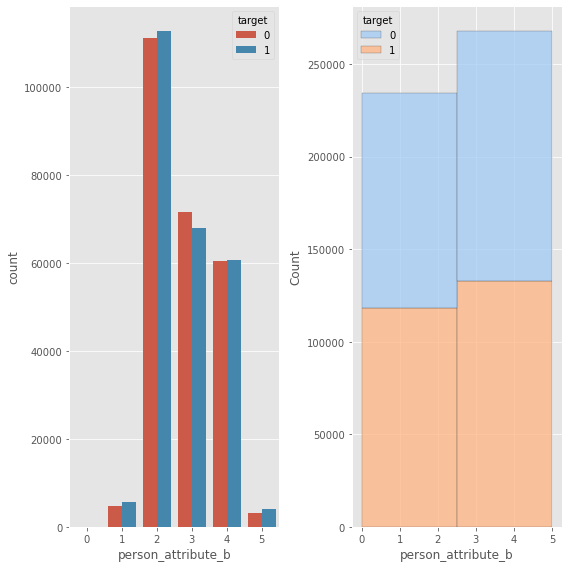

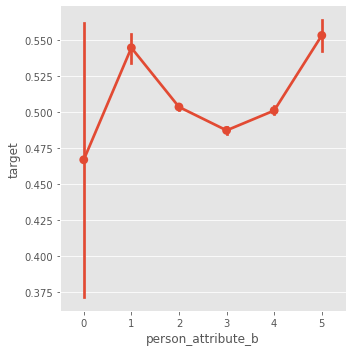

In [66]:
# person_attribute_b : 회원 속성 B
train['person_attribute_b'].value_counts().plot.bar(title = 'person_attribute_b')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'person_attribute_b'
y = 'target'

sns.countplot('person_attribute_b', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "person_attribute_b",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

sns.factorplot(x, y, data = train)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


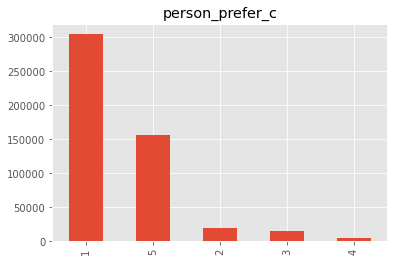

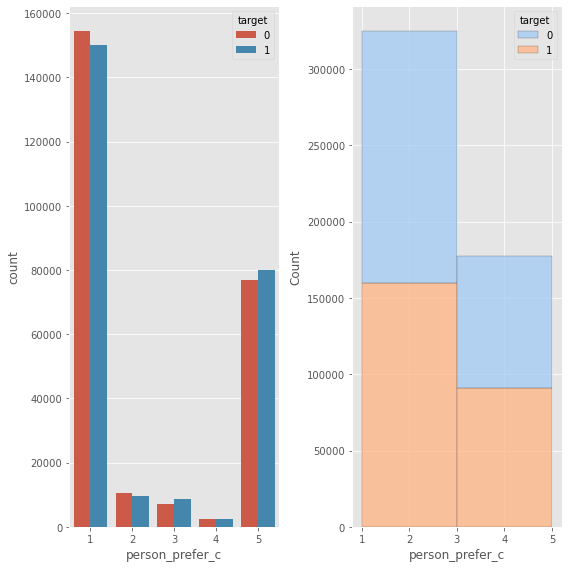

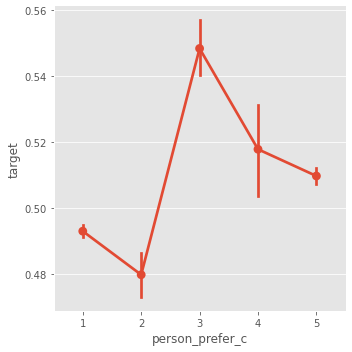

In [67]:
# person_prefer_c : 회원속성 C
train['person_prefer_c'].value_counts().plot.bar(title = 'person_prefer_c')

f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'person_prefer_c'
y = 'target'

sns.countplot('person_prefer_c', hue = 'target', data = train, ax = ax[0])

sns.histplot(train,
            x = "person_prefer_c",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)
sns.factorplot(x, y, data = train)